In [4]:
# Lib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pywt
from scipy import signal
from scipy.optimize import curve_fit

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy 
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (15, 15) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Define Column Names
columns=["timeRelativeRef", "samplingTime", "epoch", "latitude","longitude","altitude","speed", 
            "satellites","accelerationX", "accelerationY", "accelerationZ", "roll", "pitch","yaw",
            "temperatur","humidity", "barometricPressure","light","PM1.0_CF1", "PM2.5_CF1", "PM10.0_CF1",
            "PM1.0_Auto", "PM2.5_Auto", "PM10.0_Auto","label"]

In [8]:
# Read all data
Bricked1 = pd.read_csv("Labeled Training data\Bricked road\DATA002.CSV", names=columns)
Bricked2 = pd.read_csv("Labeled Training data\Bricked road\DATA004.CSV", names=columns)

Manhole = pd.read_csv("Labeled Training data\Manhole\DATA004.CSV", names=columns)

Pothole1 = pd.read_csv("Labeled Training data\Pothole\DATA001.CSV", names=columns)
#Pothole2 = pd.read_csv("Labeled Training data\Pothole\DATA002.CSV", names=columns)
Pothole3 = pd.read_csv("Labeled Training data\Pothole\DATA003.CSV", names=columns)

RoadJoint1 = pd.read_csv("Labeled Training data\Road joint\DATA001.CSV", names=columns)
RoadJoint2 = pd.read_csv("Labeled Training data\Road joint\DATA003.CSV", names=columns)

StormBasin1 = pd.read_csv("Labeled Training data\Storm basin\DATA001.CSV", names=columns)
StormBasin2 = pd.read_csv("Labeled Training data\Storm basin\DATA002.CSV", names=columns)
StormBasin3 = pd.read_csv("Labeled Training data\Storm basin\DATA003.CSV", names=columns)

In [10]:
# add labels in all DataFrames

Bricked1['label'] = 'bricked'
Bricked2['label'] = 'bricked'

Manhole['label'] = 'manhole'

Pothole1['label'] = 'pothole'
#Pothole2['label'] = 'pothole'
Pothole3['label'] = 'pothole'

RoadJoint1['label'] = 'roadJoint'
RoadJoint2['label'] = 'roadJoint'

StormBasin1['label'] = 'stormBasin'
StormBasin2['label'] = 'stormBasin'
StormBasin3['label'] = 'stormBasin'

In [11]:
# combine all above DataFrames # add Pothole2 when fixed

data = pd.concat([Bricked1,Bricked2, 
                Manhole, 
                Pothole1,Pothole3, 
                RoadJoint1, RoadJoint2,
                StormBasin1,StormBasin2, StormBasin3 ])
# Check Shape
data.shape

(937836, 25)

### Coy file

In [100]:
temp = Bricked2
df = temp.copy()

In [101]:
df.head().T

,0,1,2,3,4
timeRelativeRef,1383982,1384051,1384066,1384071,1384074
samplingTime,1383982,69,16,4,3
epoch,NaN,NaN,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN
altitude,NaN,NaN,NaN,NaN,NaN
speed,NaN,NaN,NaN,NaN,NaN
satellites,NaN,NaN,NaN,NaN,NaN
accelerationX,-0.36,-0.35,-0.35,-0.35,-0.35
accelerationY,-0.04,-0.05,-0.06,-0.05,-0.05


In [102]:
df['timeRelative_sec'] = df['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df['timeRelative_sec'] = df['timeRelative_sec']-min(df['timeRelative_sec']) # start time form zero to make more sence 

df['equal_sampled_numbers'] = df.index # i think we don’t have equally sampled time space, lets create one starting from zero

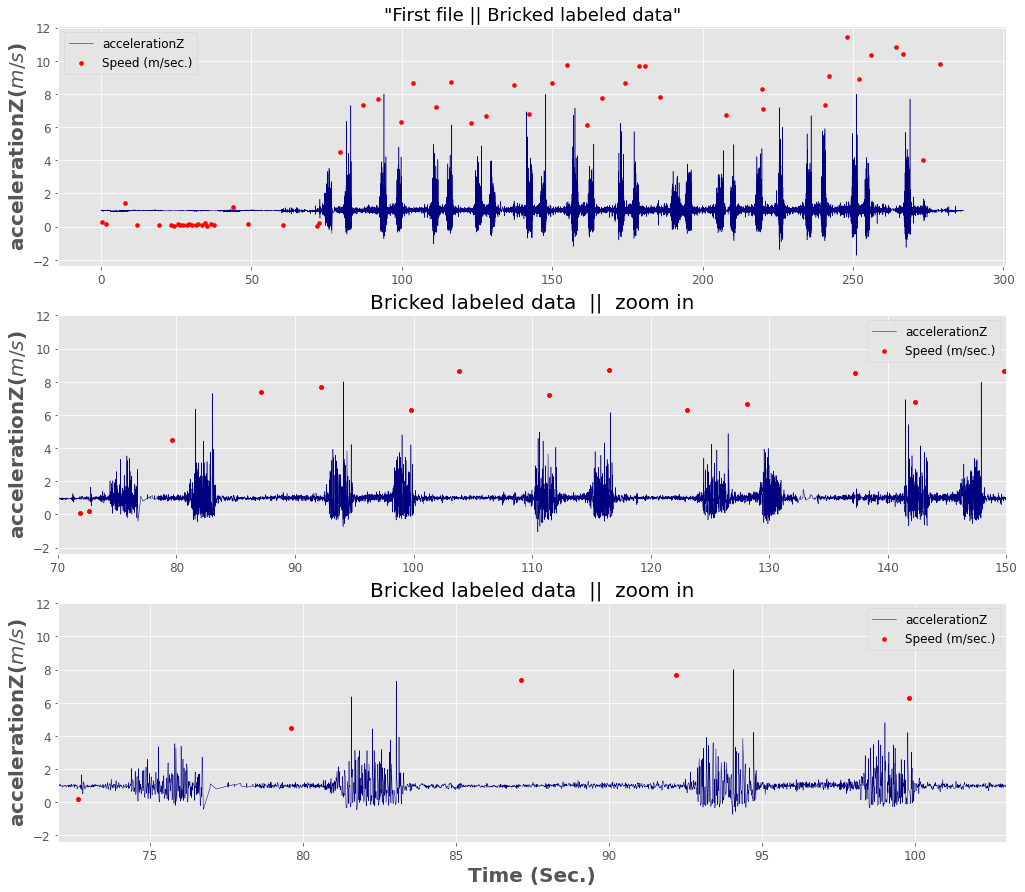

In [103]:
x = df.timeRelative_sec
xe = df.equal_sampled_numbers
y = df.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || Bricked labeled data"',fontsize=18)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.title('Bricked labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.title('Bricked labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)

In [104]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
timeRelativeRef,78028.0,1.527227e+06,82731.81,1.383982e+06,1.454720e+06,1.527698e+06,1.599264e+06,1.670662e+06
samplingTime,78028.0,2.140000e+01,4954.55,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.383982e+06
epoch,56.0,1.651413e+09,84.96,1.651413e+09,1.651413e+09,1.651413e+09,1.651413e+09,1.651413e+09
latitude,56.0,5.571000e+01,0.00,5.571000e+01,5.571000e+01,5.571000e+01,5.571000e+01,5.571000e+01
longitude,56.0,1.255000e+01,0.00,1.255000e+01,1.255000e+01,1.255000e+01,1.255000e+01,1.255000e+01
altitude,56.0,2.477000e+01,3.81,1.560000e+01,2.255000e+01,2.590000e+01,2.765000e+01,2.990000e+01
speed,56.0,4.580000e+00,4.17,3.000000e-02,1.400000e-01,6.200000e+00,8.560000e+00,1.142000e+01
satellites,56.0,1.200000e+01,0.00,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
accelerationX,78028.0,-2.600000e-01,0.20,-3.560000e+00,-3.300000e-01,-2.700000e-01,-1.800000e-01,1.350000e+00
accelerationY,78028.0,2.000000e-02,0.24,-2.280000e+00,-4.000000e-02,0.000000e+00,7.000000e-02,3.530000e+00


In [105]:

import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

aa = df.accelerationZ
aa= aa.to_numpy()
data = aa.copy()
sampleRate = 100
times = np.arange(len(data))/sampleRate

# apply a 3-pole lowpass filter at 0.1x Nyquist frequency
b, a = scipy.signal.butter(3, 0.1)

filtered = scipy.signal.filtfilt(b, a, data)

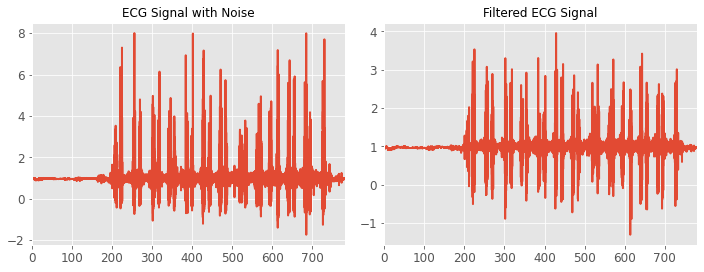

In [106]:
# plot the original data next to the filtered data

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(times, data)
plt.title("ECG Signal with Noise")
plt.margins(0, .05)

plt.subplot(122)
plt.plot(times, filtered)
plt.title("Filtered ECG Signal")
plt.margins(0, .05)

plt.tight_layout()
plt.show()

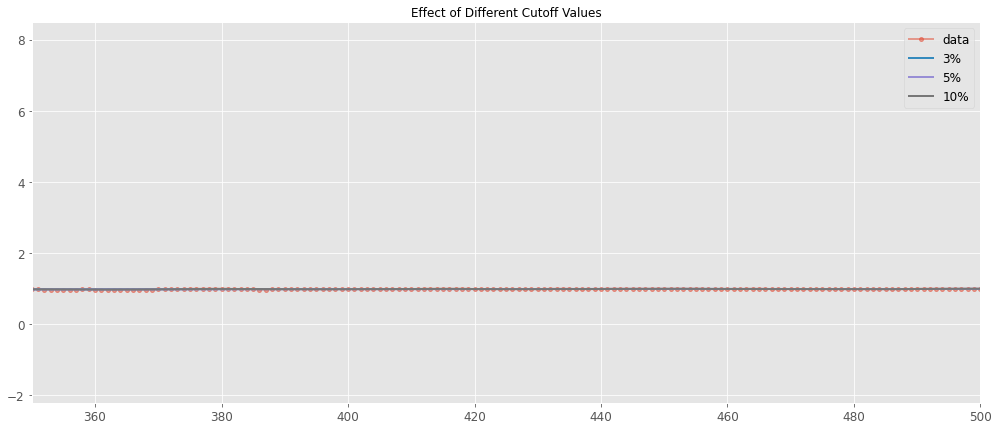

In [107]:
plt.plot(data, '.-', alpha=.5, label="data")

for cutoff in [.03, .05, .1]:
    b, a = scipy.signal.butter(3, cutoff)
    filtered = scipy.signal.filtfilt(b, a, data)
    label = f"{int(cutoff*100):d}%"
    plt.plot(filtered, label=label)

plt.legend()
plt.axis([350, 500, None, None])
plt.title("Effect of Different Cutoff Values")
plt.show()

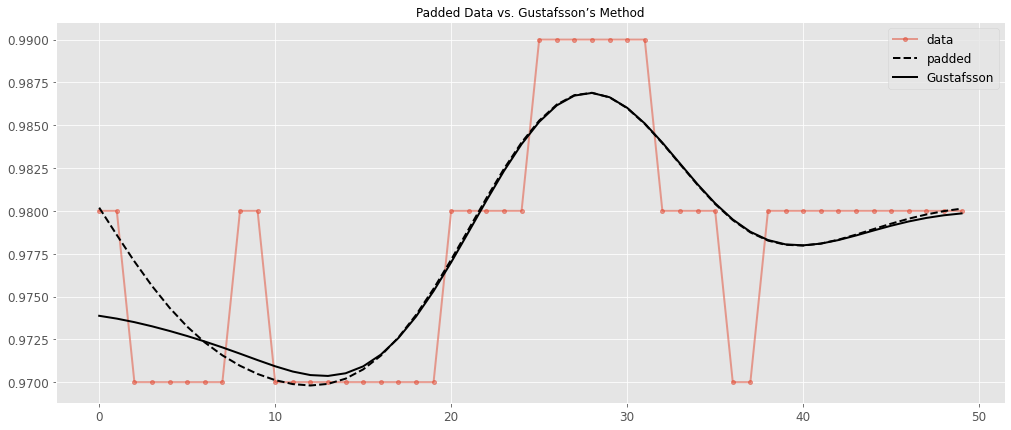

In [108]:
# A small portion of data will be inspected for demonstration
segment = data[350:400]

filtered = scipy.signal.filtfilt(b, a, segment)
filteredGust = scipy.signal.filtfilt(b, a, segment, method="gust")

plt.plot(segment, '.-', alpha=.5, label="data")
plt.plot(filtered, 'k--', label="padded")
plt.plot(filteredGust, 'k', label="Gustafsson")
plt.legend()
plt.title("Padded Data vs. Gustafsson’s Method")
plt.show()

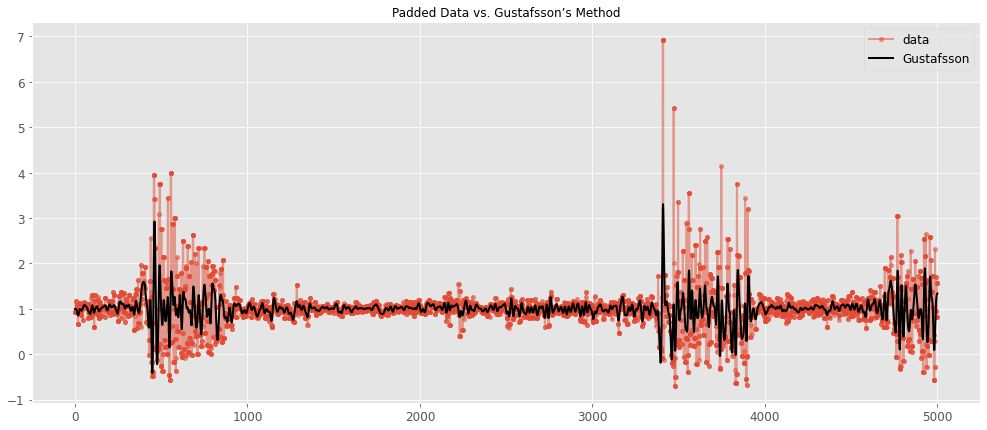

In [109]:
# A small portion of data will be inspected for demonstration
segment = data[35000:40000]

filtered = scipy.signal.filtfilt(b, a, segment)
filteredGust = scipy.signal.filtfilt(b, a, segment, method="gust")

plt.plot(segment, '.-', alpha=.5, label="data")
#plt.plot(filtered, 'k--', label="padded")
plt.plot(filteredGust, 'k', label="Gustafsson")
plt.legend()
plt.title("Padded Data vs. Gustafsson’s Method")
plt.show()

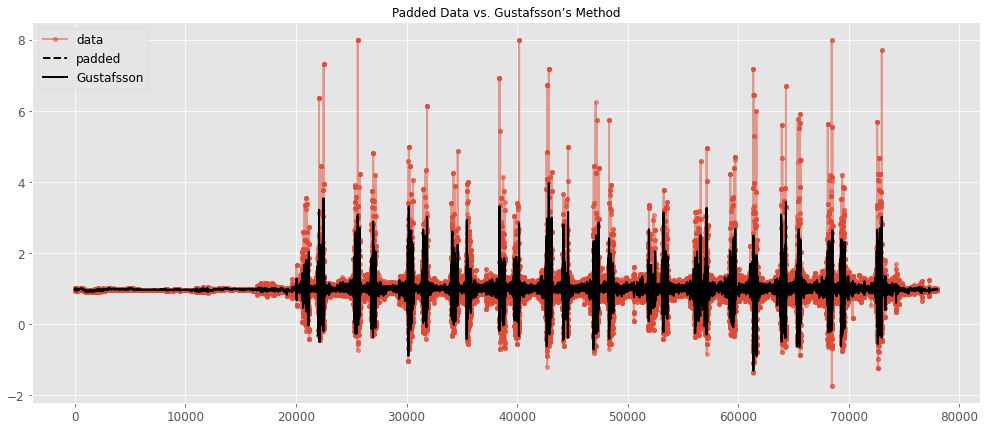

In [110]:
# A small portion of data will be inspected for demonstration
segment = data[:]

filtered = scipy.signal.filtfilt(b, a, segment)
filteredGust = scipy.signal.filtfilt(b, a, segment, method="gust")

plt.plot(segment, '.-', alpha=.5, label="data")
plt.plot(filtered, 'k--', label="padded")
plt.plot(filteredGust, 'k', label="Gustafsson")
plt.legend()
plt.title("Padded Data vs. Gustafsson’s Method")
plt.show()

In [111]:
len(filteredGust)

78028

In [112]:
df

,timeRelativeRef,samplingTime,epoch,latitude,longitude,altitude,speed,satellites,accelerationX,accelerationY,...,light,PM1.0_CF1,PM2.5_CF1,PM10.0_CF1,PM1.0_Auto,PM2.5_Auto,PM10.0_Auto,label,timeRelative_sec,equal_sampled_numbers
0,1383982,1383982,NaN,NaN,NaN,NaN,NaN,NaN,-0.36,-0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bricked,0.000,0
1,1384051,69,NaN,NaN,NaN,NaN,NaN,NaN,-0.35,-0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bricked,0.069,1
2,1384066,16,NaN,NaN,NaN,NaN,NaN,NaN,-0.35,-0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bricked,0.084,2
3,1384071,4,NaN,NaN,NaN,NaN,NaN,NaN,-0.35,-0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bricked,0.089,3
4,1384074,3,NaN,NaN,NaN,NaN,NaN,NaN,-0.35,-0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bricked,0.092,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78023,1670647,2,NaN,NaN,NaN,NaN,NaN,NaN,-0.30,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bricked,286.665,78023
78024,1670649,3,NaN,NaN,NaN,NaN,NaN,NaN,-0.30,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bricked,286.667,78024
78025,1670652,2,NaN,NaN,NaN,NaN,NaN,NaN,-0.30,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bricked,286.670,78025
78026,1670659,7,NaN,NaN,NaN,NaN,NaN,NaN,-0.28,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bricked,286.677,78026


In [113]:
df['Gustafsson'] = filteredGust

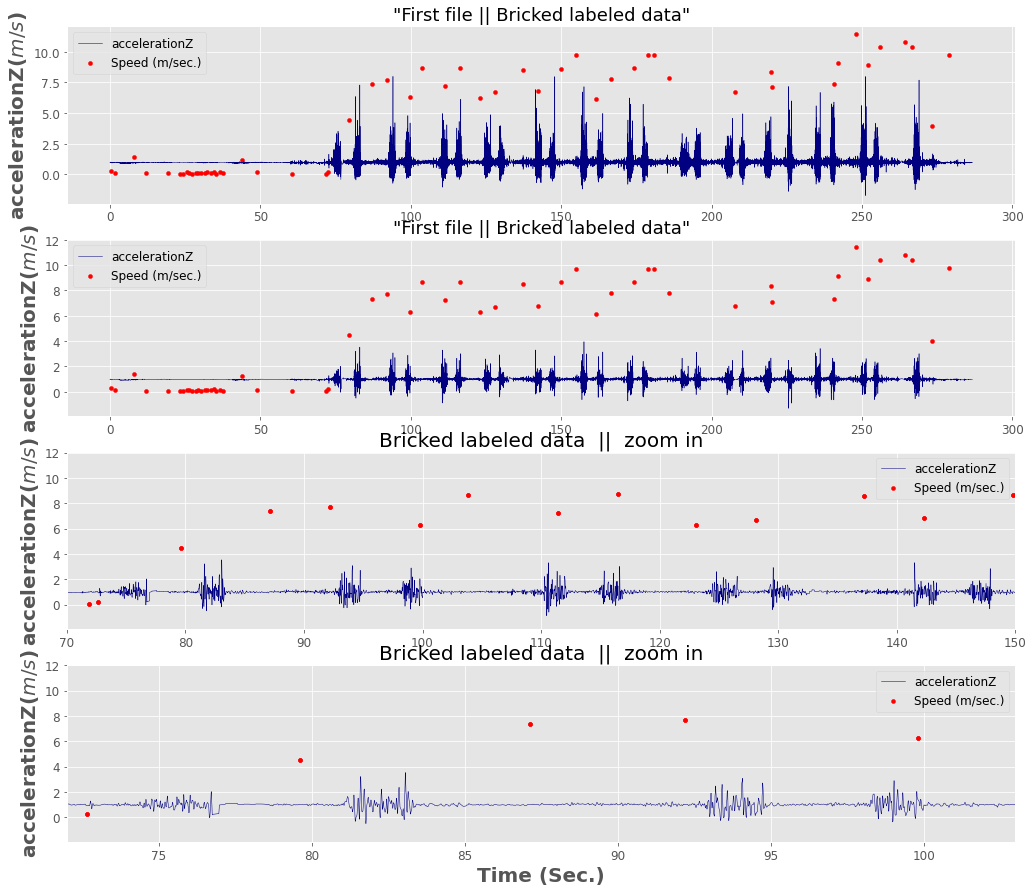

In [115]:
y1 = df['Gustafsson']
x = df.timeRelative_sec
xe = df.equal_sampled_numbers
y = df.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(4,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || Bricked labeled data"',fontsize=18)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

y1 = df['Gustafsson']



plt.subplot(4,1,2)
plt.plot(x,y1,'navy', linewidth = 0.5);plt.title('"First file || Bricked labeled data"',fontsize=18)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)


plt.subplot(4,1,3)
plt.plot(x,y1,'navy', linewidth = 0.5)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.title('Bricked labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(4,1,4)
plt.plot(x,y1,'navy', linewidth = 0.5)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.title('Bricked labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)

Text(0, 0.5, 'Z')

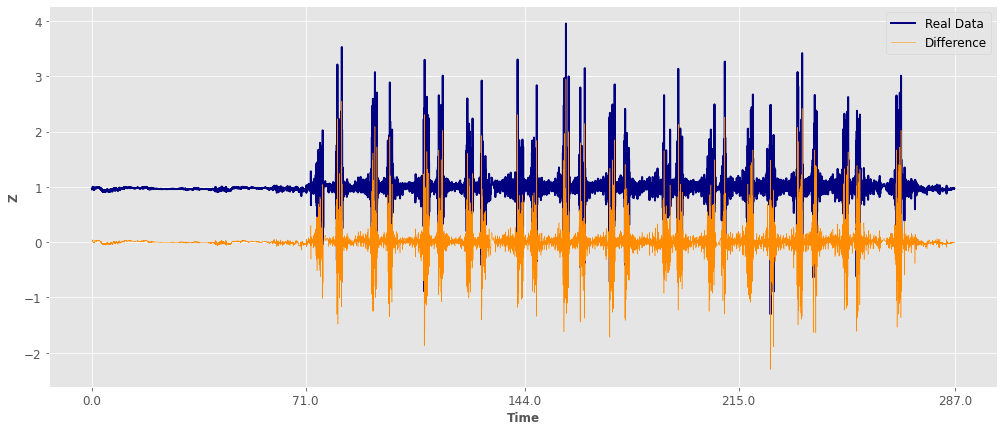

In [118]:
y = y1.copy()
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Z')

Text(0, 0.5, 'Fourier Amplitude')

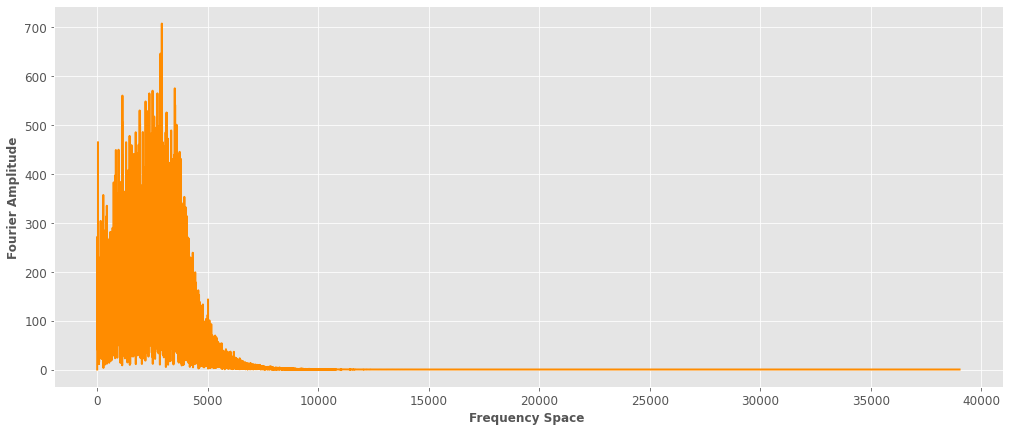

In [119]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [122]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [123]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

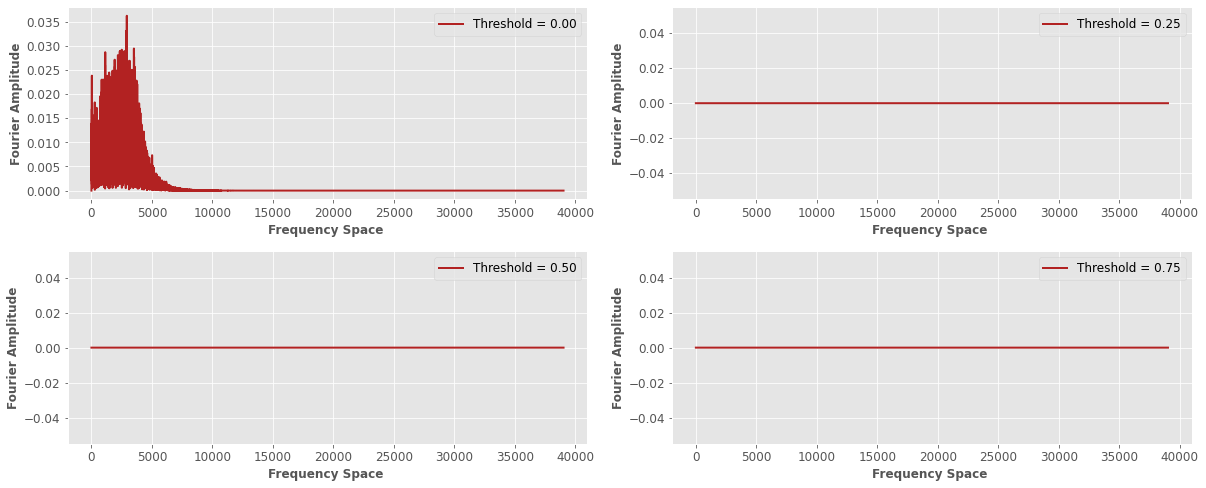

In [124]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

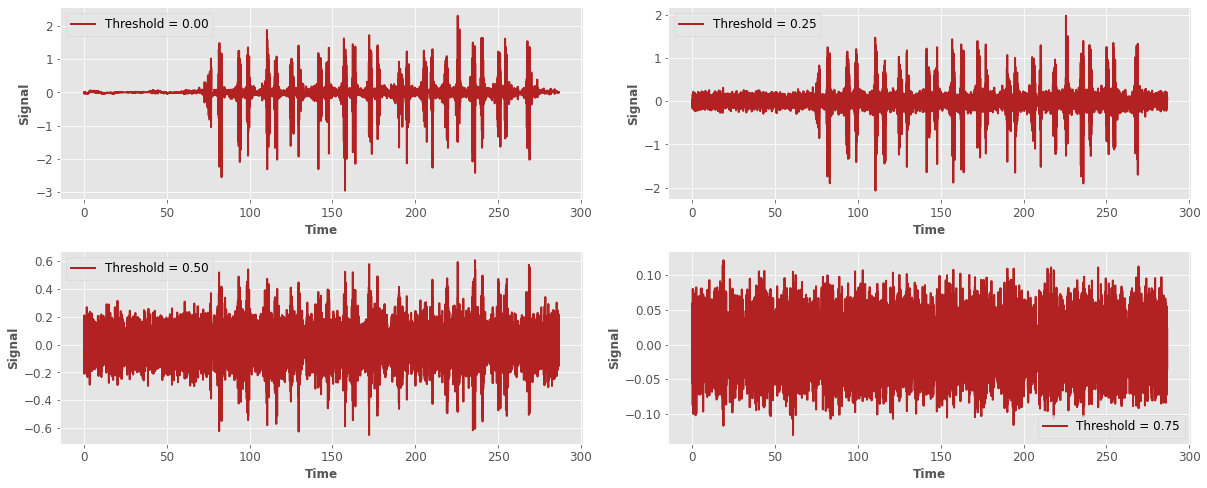

In [125]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

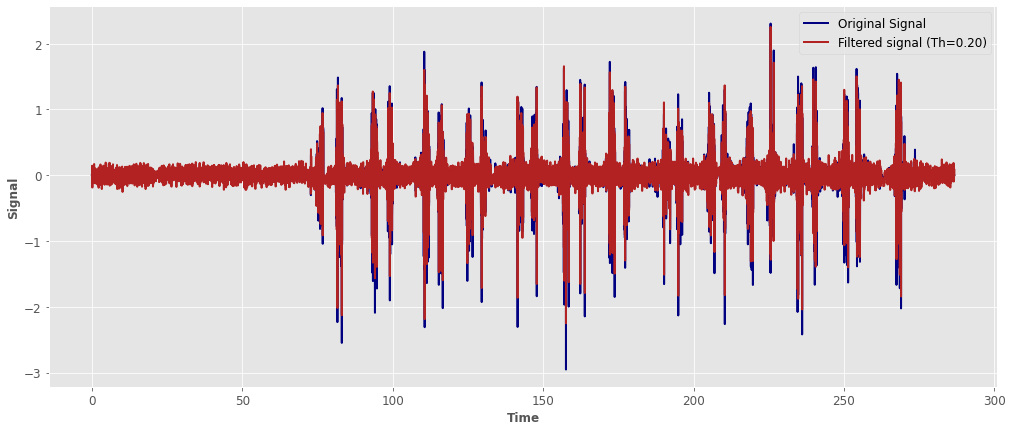

In [126]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

Text(0.5, 0, 'Threshold Value')

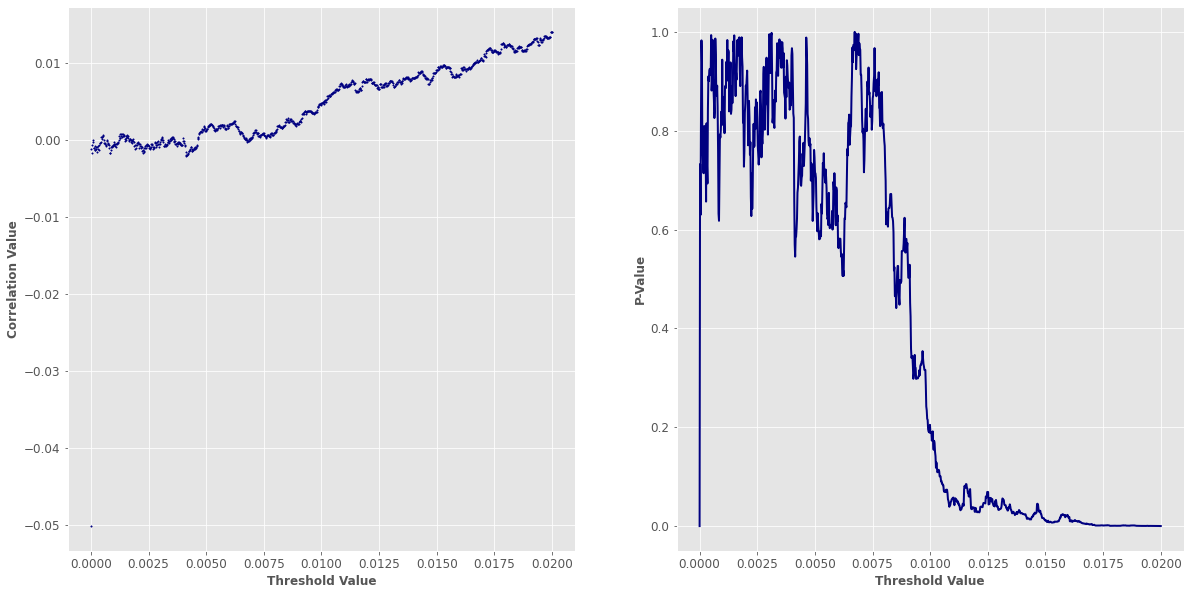

In [127]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [128]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

0.0

In [129]:
y1


0        0.959117
1        0.959152
2        0.959235
3        0.959388
4        0.959633
           ...   
78023    0.970595
78024    0.970639
78025    0.970646
78026    0.970632
78027    0.970609
Name: Gustafsson, Length: 78028, dtype: float64